In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import statistics

In [2]:
df = pd.read_csv('PATCH_13.1_9500_GAMES.csv')

In [3]:
df = df.loc[df['game_duration'] > 15]
df['kills_per_min'] = df['kills']/df['game_duration']
df['deaths_per_min'] = df['deaths']/df['game_duration']
df['assists_per_min'] = df['assists']/df['game_duration']
df['damage_taken_per_min'] = df['damage_taken']/df['game_duration']
df['damage_dealt_to_objectives_per_min'] = df['damage_dealt_to_objectives']/df['game_duration']
df['damage_healed_per_min'] = df['damage_healed']/df['game_duration']
df['heal_and_shielding_per_min'] = df['heal_and_shielding']/df['game_duration']
df['wards_placed_per_min'] = df['wards_placed']/df['game_duration']
df['ward_takedowns_per_min'] = df['ward_takedowns']/df['game_duration']
df['control_wards_placed_per_min'] = df['control_wards_placed']/df['game_duration']
df['dragons'] = df['dragon_takedowns']

df = df[['champion', 'position', 'game_duration', 'kills_per_min', 'deaths_per_min', 'assists_per_min', 'kill_participation', 'cs_per_min', 'gold_per_min', 'damage_per_min', 
         'turret_plates_taken', 'epic_monster_steals', 'dragons', 'heal_and_shielding_per_min', 'vision_score_per_min', 'wards_placed_per_min', 'ward_takedowns_per_min', 'control_wards_placed_per_min']]

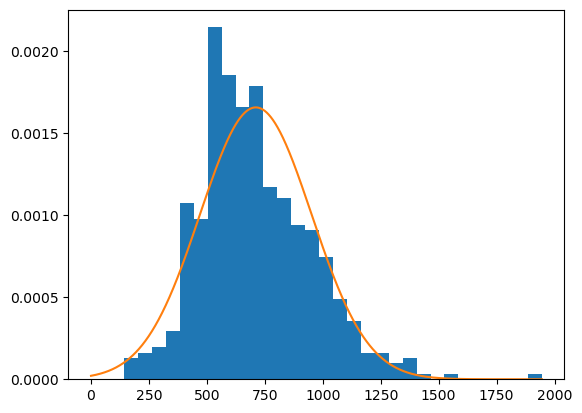

0.16259421603849725


In [4]:
def dist(Champion, Position, StatName, StatValue):
    
    df2 = df.loc[df['champion'] == Champion]
    df3 = df2.loc[df2['position'] == Position]
    stat = df3[StatName]
    
    plt.hist(stat, bins = 30, density = True);
    mean = statistics.mean(stat)
    stdev = statistics.stdev(stat)
    x_axis = np.arange(0, stat.max(), 0.01)
    plt.plot(x_axis, norm.pdf(x_axis, mean, stdev));
    plt.show();
    
    z_score = (StatValue - mean)/(stdev)
    print(z_score)
    
    return

dist('Ahri', 'MIDDLE', 'damage_per_min', 750)